# Personality Prediction
Conda environment check

About Dataset
Description
This synthetic dataset is designed to explore and predict Myers-Briggs Type Indicator (MBTI) personality types based on a combination of demographic factors, interest areas, and personality scores. It includes 100K+ samples, each representing an individual with various features that contribute to determining their MBTI type. The dataset can be used to study correlations between different personality dimensions and external factors such as age, gender, education, and interests.

Feature Descriptions
Age: A continuous variable representing the age of the individual.

Gender: A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.

Education: A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.

Interest: A categorical variable representing the individual's primary area of interest.

Introversion Score: A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.

Sensing Score: A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.

Thinking Score: A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.

Judging Score: A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.

Personality: Target that contains People Personality Type




In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


   Age  Gender  Education  Introversion Score  Sensing Score  Thinking Score  \
0   19    Male          0             9.47080       7.141434         6.03696   
1   27  Female          0             5.85392       6.160195         0.80552   
2   21  Female          0             7.08615       3.388433         2.66188   
3   28    Male          0             2.01892       4.823624         7.30625   
4   36  Female          1             9.91703       4.755080         5.31469   

   Judging Score    Interest Personality  
0       4.360278     Unknown        ENFP  
1       4.221421      Sports        ESFP  
2       5.127320     Unknown        ENFP  
3       5.986550      Others        INTP  
4       4.677213  Technology        ENFP  
Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')


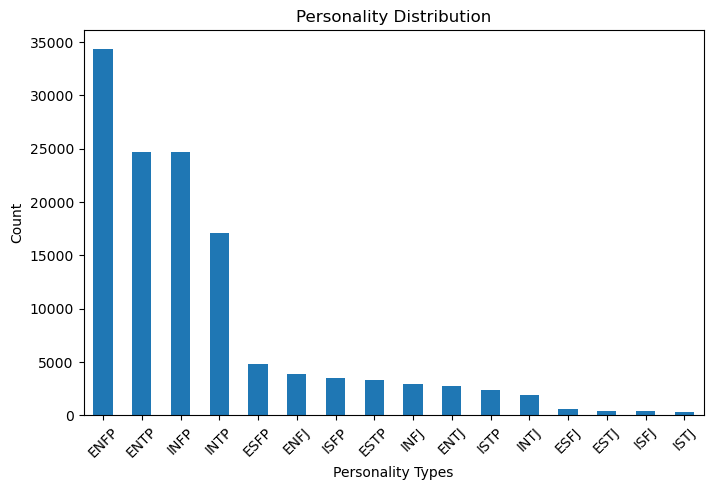

<Figure size 800x500 with 0 Axes>

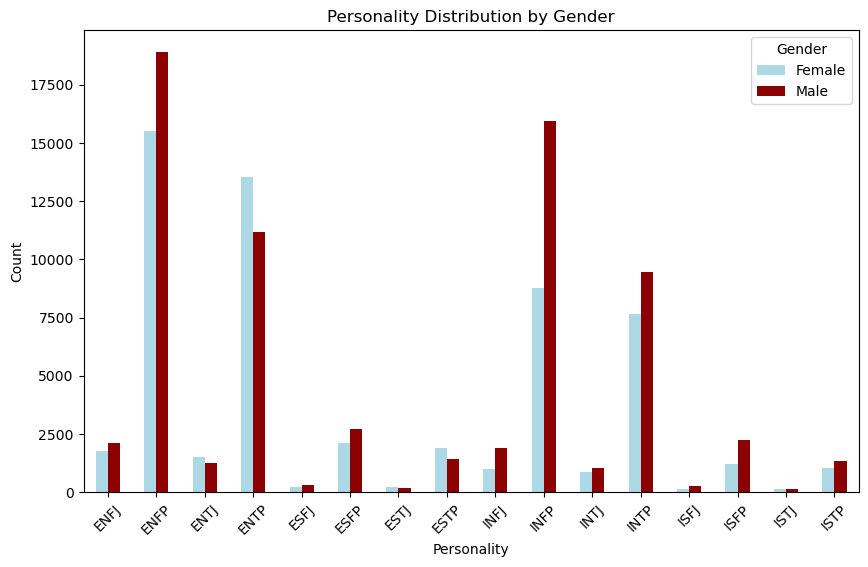

count     128061
unique        16
top         ENFP
freq       34404
Name: Personality, dtype: object
Personality
ENFP    34404
ENTP    24718
INFP    24711
INTP    17132
ESFP     4832
ENFJ     3883
ISFP     3456
ESTP     3334
INFJ     2919
ENTJ     2783
ISTP     2390
INTJ     1920
ESFJ      554
ESTJ      392
ISFJ      371
ISTJ      262
Name: count, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'data/personality.csv' 
df = pd.read_csv(file_path, header=0) 

print(df.head())
print(df.columns)

# Plot 1: Personality Distribution
plt.figure(figsize=(8, 5))
df['Personality'].value_counts().plot(kind='bar')

# Set title and labels
plt.title('Personality Distribution')
plt.xlabel('Personality Types')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Save the plot before showing
plt.savefig('personality_distribution.png', dpi=300, bbox_inches='tight')  # Save the image
plt.show()

# Group by Personality and Gender
personality_gender = df.groupby(['Personality', 'Gender']).size().unstack()

# Plot 2: Personality Distribution by Gender
plt.figure(figsize=(8, 5))
personality_gender.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'darkred'])

# Set title and labels
plt.title('Personality Distribution by Gender')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Gender')

# Save the plot before showing
plt.savefig('personality_distribution_by_gender.png', dpi=300, bbox_inches='tight')  # Save the image
plt.show()
print(df["Personality"].describe())
# Group by Personality and Gender

print(df['Personality'].value_counts())


<Figure size 800x500 with 0 Axes>

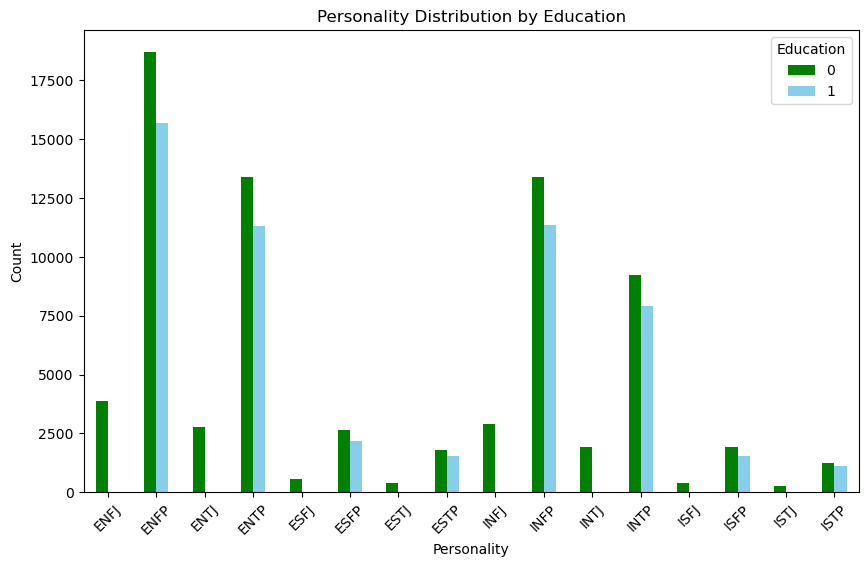

count     128061
unique        16
top         ENFP
freq       34404
Name: Personality, dtype: object


In [3]:
personality_gender = df.groupby(['Personality', 'Education']).size().unstack()

# Plot 2: Personality Distribution by Gender
plt.figure(figsize=(8, 5))
personality_gender.plot(kind='bar', figsize=(10, 6), color=['green', 'skyblue'])

# Set title and labels
plt.title('Personality Distribution by Education')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Education')

# Save the plot before showing
plt.savefig('personality_distribution_by_gender.png', dpi=300, bbox_inches='tight')  # Save the image
plt.show()
print(df["Personality"].describe())


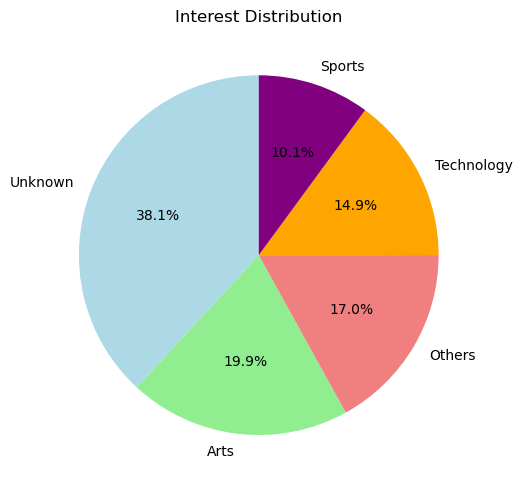

count      128061
unique          5
top       Unknown
freq        48835
Name: Interest, dtype: object
The ratio of missing value in Interest is 0.38134170434402354


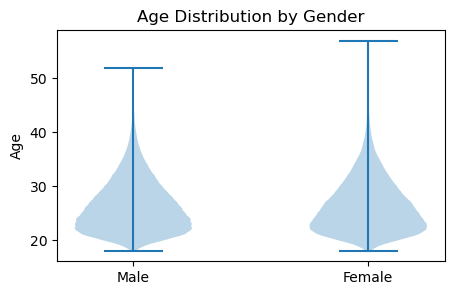

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 绘制饼图
plt.figure(figsize=(8, 5))
df['Interest'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'orange', 'purple'])

# 设置标题
plt.title('Interest Distribution')

# 移除y轴标签，并确保图像紧凑布局
plt.ylabel('')  # 不需要在饼图上显示 y 轴标签
plt.tight_layout()

# 先保存饼图，然后显示
plt.savefig('interest_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# 打印 Interest 列的描述信息
print(df['Interest'].describe())
print("The ratio of missing value in Interest is", 48835 / 128061)


# 绘制小提琴图
dataset = [
    df[df['Gender'] == 'Male']['Age'].values, 
    df[df['Gender'] == 'Female']['Age'].values
]

# 创建图像
plt.figure(figsize=(5, 3))

# 创建小提琴图
plt.violinplot(dataset=dataset)

# 设置x轴标签
plt.xticks([1, 2], ['Male', 'Female'])

# 设置y轴标签
plt.ylabel('Age')

# 设置图像标题
plt.title('Age Distribution by Gender')

# 先保存小提琴图，然后显示
plt.savefig('age_distribution_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()


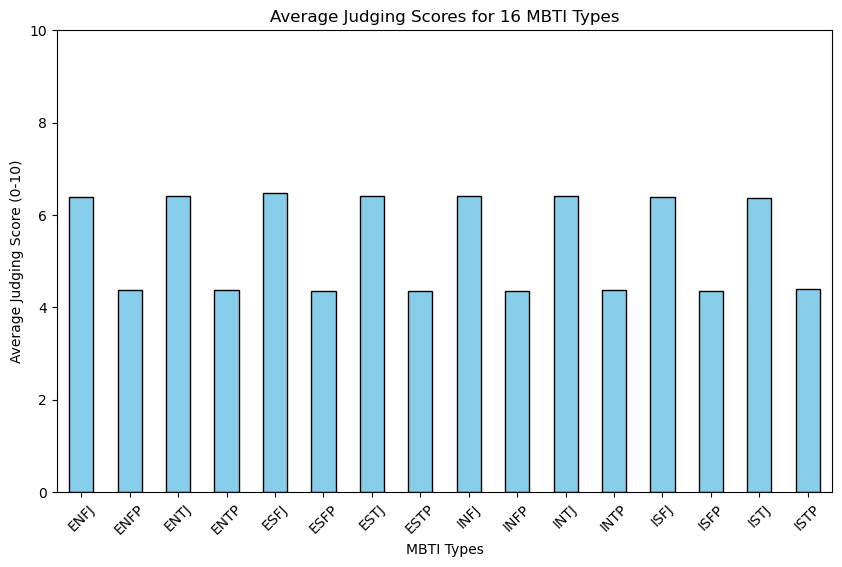

J-P pairs



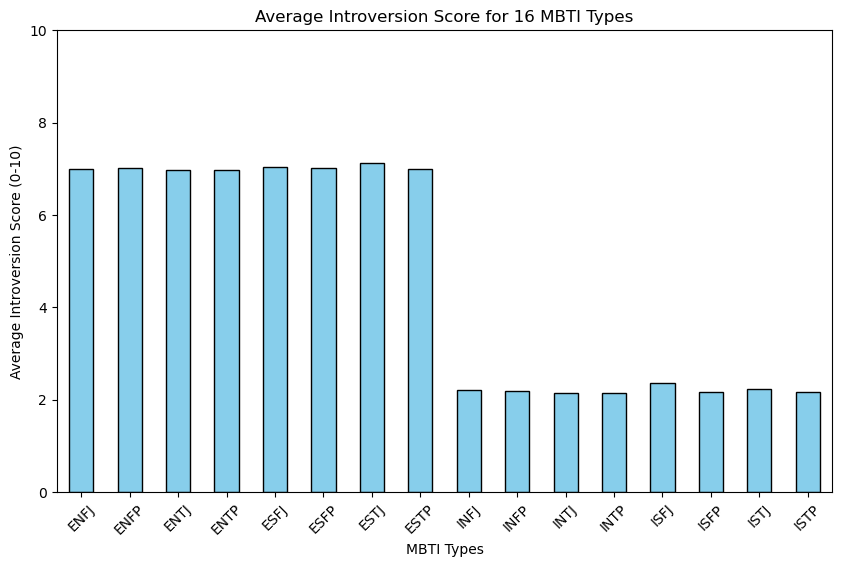

E-I pairs



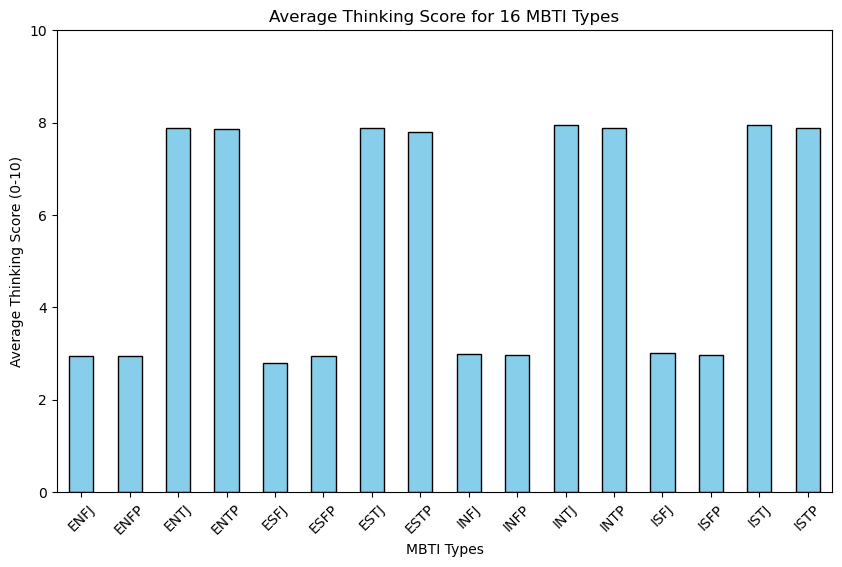

F-T pairs


In [5]:
import matplotlib.pyplot as plt

# 1. Average Judging Scores for 16 MBTI Types
avg_scores = df.groupby('Personality')['Judging Score'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Average Judging Scores for 16 MBTI Types')
plt.xlabel('MBTI Types')
plt.ylabel('Average Judging Score (0-10)')
plt.xticks(rotation=45)
plt.ylim(0, 10)

# Save the plot
plt.savefig('avg_judging_scores.png', dpi=300, bbox_inches='tight')
plt.show()
print("J-P pairs")
print()

# 2. Average Introversion Score for 16 MBTI Types
avg_scores = df.groupby('Personality')['Introversion Score'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Average Introversion Score for 16 MBTI Types')
plt.xlabel('MBTI Types')
plt.ylabel('Average Introversion Score (0-10)')
plt.xticks(rotation=45)
plt.ylim(0, 10)

# Save the plot
plt.savefig('avg_introversion_scores.png', dpi=300, bbox_inches='tight')
plt.show()
print("E-I pairs")
print()

# 3. Average Thinking Score for 16 MBTI Types
avg_scores = df.groupby('Personality')['Thinking Score'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Average Thinking Score for 16 MBTI Types')
plt.xlabel('MBTI Types')
plt.ylabel('Average Thinking Score (0-10)')
plt.xticks(rotation=45)
plt.ylim(0, 10)

# Save the plot
plt.savefig('avg_thinking_scores.png', dpi=300, bbox_inches='tight')
plt.show()
print("F-T pairs")


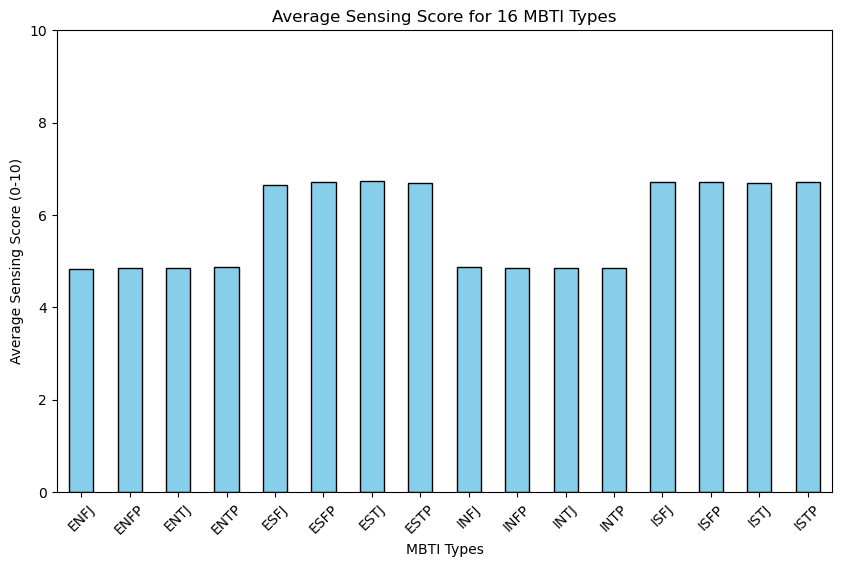

N-S pairs


In [6]:
avg_scores = df.groupby('Personality')['Sensing Score'].mean()

# Plotting the bar chart for MBTI types and their average judging scores
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Average Sensing Score for 16 MBTI Types')
plt.xlabel('MBTI Types')
plt.ylabel('Average Sensing Score (0-10)')
plt.xticks(rotation=45)
plt.ylim(0, 10)

# Display the plot
plt.savefig('avg_sensing_scores.png', dpi=300, bbox_inches='tight')
plt.show()
print("N-S pairs")

# Splitting data

iid dataset

In [7]:
from sklearn.model_selection import train_test_split 
# import pandas as pd;

def basic_split(X, y, train_size, val_size, test_size, random_state=None):
    total_size = train_size + val_size + test_size
    if total_size>0 and total_size<1:
       raise ValueError("The sum of total_size must equals to 1.")
        
    if isinstance(random_state,int):
        print('random_state correct')
    else:
        raise ValueError("random_state must be an integer.")

   
    # Split dataset to get train and temp (val + test)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state)
    
    val_proportion = val_size / (val_size + test_size)

    # Split dataset  to get validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=val_proportion, random_state=random_state)
    
    # Output Size Tests
    initial_size = len(X)
    if abs(len(X_train) - int(initial_size * train_size)) > 1:
        raise ValueError("X_train size is incorrect.")
    if abs(len(X_val) - int(initial_size * val_size)) > 1:
        raise ValueError("X_val size is incorrect.")
    if abs(len(X_test) - int(initial_size * test_size)) > 1:
        raise ValueError("X_test size is incorrect.")
   

    return X_train, y_train, X_val, y_val, X_test, y_test

# Test Part
X=df.drop(columns='Personality')
Y=df['Personality']

# Apply the basic_split function
train_size = 0.6
val_size = 0.2
test_size = 0.2
random_state = 42

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X, Y, train_size, val_size, test_size, random_state)

# Print the head of the train, validation, and test feature matrices
print("X_train Head:")
print(X_train.head())
print("\nX_val Head:")
print(X_val.head())
print("\nX_test Head:")
print(X_test.head())
print('#######################################################################################')
print(len(X_train))
print(len(X_val))
print(len(X_test))

random_state correct
X_train Head:
       Age  Gender  Education  Introversion Score  Sensing Score  \
61257   25    Male          1             9.78944       4.229537   
76388   27  Female          0             9.58204       4.089001   
87395   23    Male          0             9.42091       4.484236   
91377   29    Male          0             0.15242       7.058043   
87219   23  Female          1             6.37940       5.249467   

       Thinking Score  Judging Score    Interest  
61257         4.20288       5.899314  Technology  
76388         5.96674       5.324294      Others  
87395         3.75354       3.015412      Others  
91377         3.25689       2.150550      Others  
87219         4.02204       3.341589     Unknown  

X_val Head:
        Age Gender  Education  Introversion Score  Sensing Score  \
116976   24   Male          1             4.23221       6.509942   
123735   24   Male          0             3.90061       4.803389   
127604   21   Male          0    

In [8]:
print(df['Interest'].value_counts())

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# 创建一个 LabelEncoder 对象
le = LabelEncoder()

# 选择所有类型为 object 的列
object_cols = X_train.columns[X_train.dtypes == 'object']

# 针对每个需要编码的列
for col in object_cols:
    # 只在训练集上进行 fit
    le.fit(X_train[col])
    
    # 在训练集、验证集和测试集上进行 transform
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

# 输出编码后的数据结构
print(X_train.info())
print(X_val.info())
print(X_test.info())
from sklearn.preprocessing import LabelEncoder

# 创建一个 LabelEncoder 对象
le_target = LabelEncoder()

# 对目标变量 personality 在训练集上进行 fit
le_target.fit(y_train)

# 对训练集、验证集和测试集上的 personality 进行 transform
y_train_enc = le_target.transform(y_train)
y_val_enc = le_target.transform(y_val)
y_test_enc = le_target.transform(y_test)

# 输出编码后的目标变量
print('y_train encoded:', y_train_enc)
print('y_val encoded:', y_val_enc)
print('y_test encoded:', y_test_enc)

# 查看编码后的信息
print(f'Classes for target personality: {le_target.classes_}')




<class 'pandas.core.frame.DataFrame'>
Index: 76836 entries, 61257 to 121958
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 76836 non-null  int64  
 1   Gender              76836 non-null  int32  
 2   Education           76836 non-null  int64  
 3   Introversion Score  76836 non-null  float64
 4   Sensing Score       76836 non-null  float64
 5   Thinking Score      76836 non-null  float64
 6   Judging Score       76836 non-null  float64
 7   Interest            76836 non-null  int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 4.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 25612 entries, 116976 to 33820
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 25612 non-null  int64  
 1   Gender              25612 non-null  int32  
 2   Education           25612 no

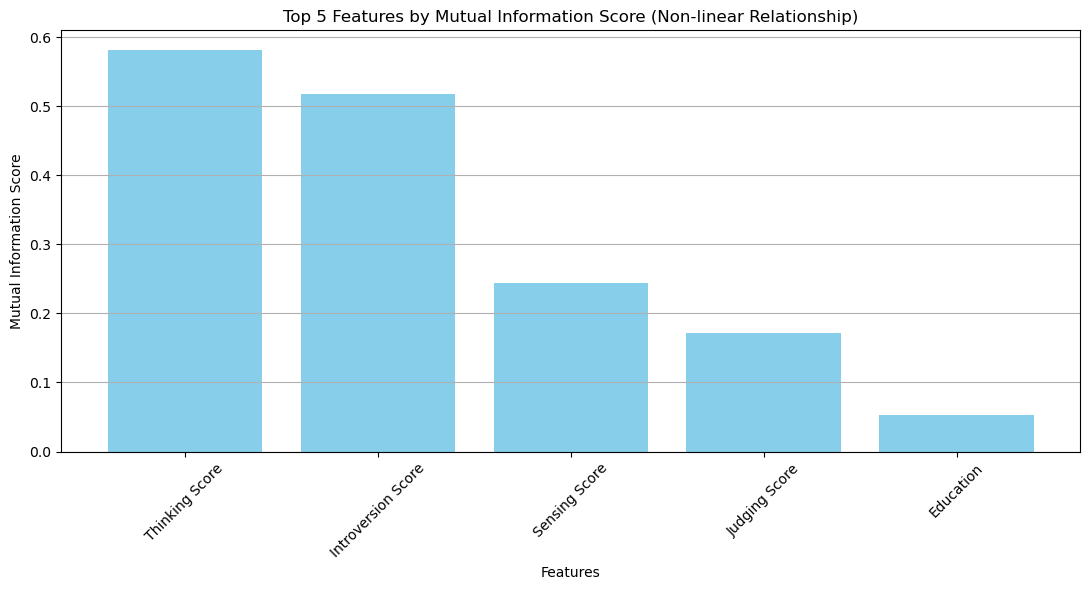

              Feature  Mutual Information Score
5      Thinking Score                  0.580933
3  Introversion Score                  0.517209
4       Sensing Score                  0.244732
6       Judging Score                  0.171243
2           Education                  0.053487


In [10]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import pandas as pd

# 确保 X_train_final 是独热编码或标签编码后的训练集特征
# y_train_enc 是经过 LabelEncoder 编码的目标变量

# 计算互信息得分，体现非线性关系
mi_scores = mutual_info_regression(X_train, y_train_enc)

# 创建一个 DataFrame 保存结果
mi_results = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information Score': mi_scores})

# 按照互信息得分从高到低排序
mi_results = mi_results.sort_values(by='Mutual Information Score', ascending=False)

# 选择前 5 个特征
top_5_features = mi_results.head(5)

# 画出柱状图，展示互信息得分最高的特征
plt.figure(figsize=(11, 6))
plt.bar(top_5_features['Feature'], top_5_features['Mutual Information Score'], color='skyblue')
plt.title('Top 5 Features by Mutual Information Score (Non-linear Relationship)')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# 保存图片
plt.savefig('top_5_mutual_info_features.png', dpi=300, bbox_inches='tight')

# 显示图片
plt.show()

# 输出结果
print(top_5_features)


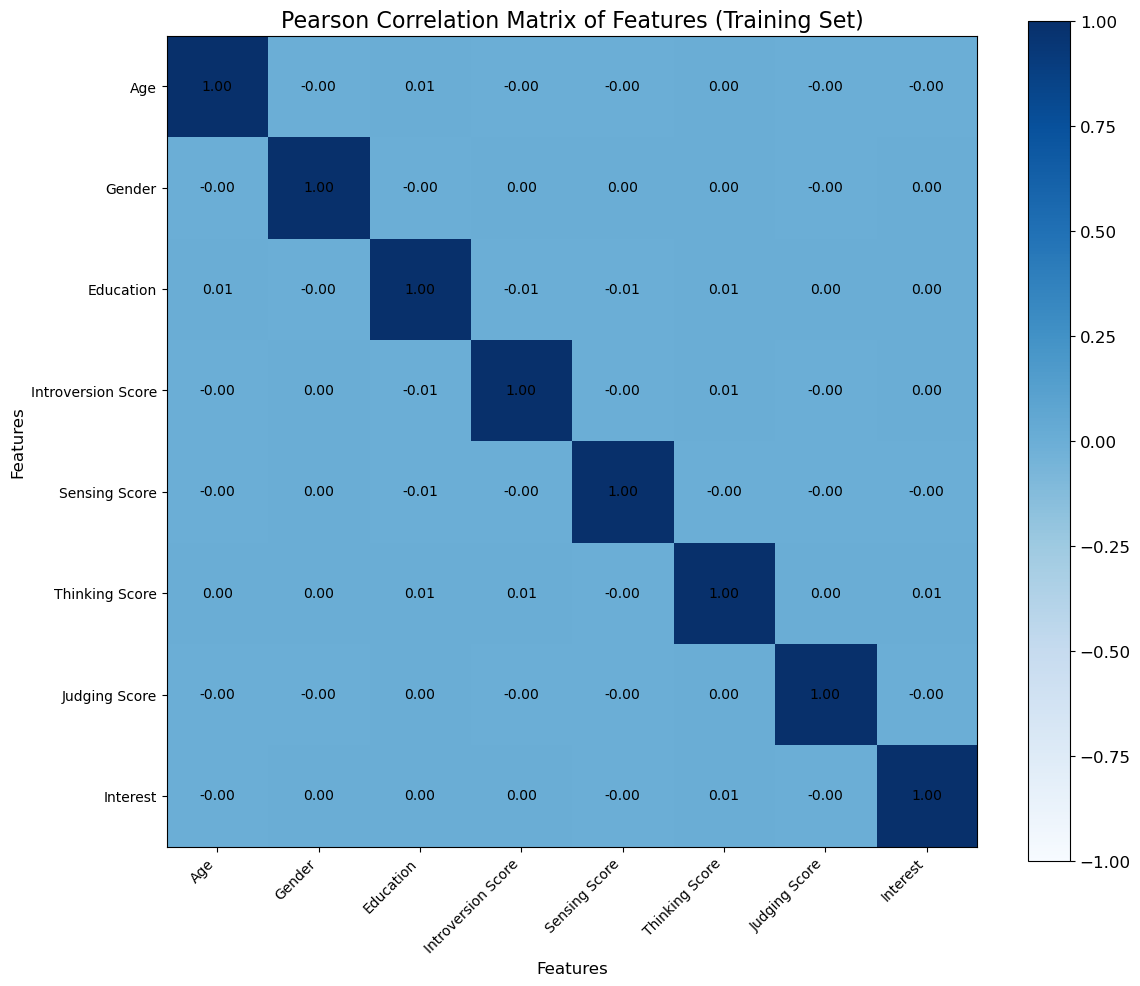

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 计算训练集中特征的皮尔逊相关性矩阵
correlation_matrix = X_train.corr(method='pearson')

# 创建一个图形并设置大小
plt.figure(figsize=(12, 10))

# 使用 imshow 绘制相关性矩阵热图
plt.imshow(correlation_matrix, cmap='Blues', vmin=-1, vmax=1)

# 添加颜色条
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)  # 设置颜色条标签的字体大小

# 设置 x 和 y 轴上的标签
plt.xticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=np.arange(len(X_train.columns)), labels=X_train.columns, fontsize=10)

# 添加每个单元格的相关系数数值，格式保留两位小数
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='black', fontsize=10)

# 设置图表标题和轴标签
plt.title('Pearson Correlation Matrix of Features (Training Set)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# 调整布局，防止标签重叠
plt.tight_layout()

# 保存图表
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()
